In [1]:
import random
import numpy as np

Implementation for 2 Generator

In [2]:
#Declaration of variables
pop_size=20
genes_count=20
D=675
mutation_probability=0.3
total_generation=20
c1=500
c2=100
b1=5.1
b2=5.9
a1=0.004
a2=0.006
min_1=50
min_2=150
max_1=350
max_2=950

In [3]:
def population():
    return [individual() for x in range (0,pop_size)]

def individual():
    s=""
    for i in range(genes_count):
        s+=str(random.randint(0,1))
    return s

In [4]:
def binary_to_decimal(binary):
    binary=int(binary)
    decimal, i = 0, 0
    while(binary != 0): 
        dec = binary % 10
        decimal = decimal + dec * pow(2, i) 
        binary = binary//10
        i += 1
    return decimal
    

In [5]:
def decode(s):
    p1=min_1+binary_to_decimal(s)*(max_1-min_1)/(pow(2,genes_count)-1)
    p2=D-p1
    return(p1,p2)

In [6]:
def fitness(s):
    p1,p2=decode(s)
    cost_1=c1+b1*p1+a1*p1*p1
    cost_2=c2+b2*p2+a2*p2*p2
    return cost_1+cost_2

In [7]:
def crossover(s1,s2):
    crossover_point=random.randint(1,genes_count-1)
    child1=s1[0:crossover_point]+s2[crossover_point:]
    child2=s2[0:crossover_point]+s1[crossover_point:]
    return (child1,child2)
   

In [8]:
def mutation (s):
    mutation_point=random.randint(genes_count//2,genes_count-2)
    
    if s[mutation_point]=='0':
        s=s[0:mutation_point]+'1'+s[mutation_point+1:]
    else:
        s=s[0:mutation_point]+'0'+s[mutation_point+1:]
    mutation_point=random.randint(0,genes_count-2)
    
    if s[mutation_point]=='0':
        s=s[0:mutation_point]+'1'+s[mutation_point+1:]
    else:
        s=s[0:mutation_point]+'0'+s[mutation_point+1:]
    return s


In [9]:
# def population_evaluation(l):
#     for i in range(len(l)):
#         print("Individual power of G1 and G2 are",round(decode(l[i])[0],2),"MW and",round(decode(l[i])[1],2),"MW respectively and Total Production Cost is ",round(fitness(l[i]),2),"$")
    

In [10]:
def fitness_value(s):
    return fitness(s)

def next_generation(l):
    l.sort(key=fitness_value)
    next_gen=[]
    while(len(next_gen)<pop_size):
        i=random.randint(0,pop_size//2)
        j=random.randint(0,pop_size//2)
        while(j==i):
            j=random.randint(0,pop_size//2)
        child1,child2=crossover(l[i],l[j])
        mp=random.uniform(0,1)
        if(mp<mutation_probability):
            child1=mutation(child1)
        mp=random.uniform(0,1)
        if(mp<mutation_probability):
            child2=mutation(child2)
        next_gen.append(child1)
        next_gen.append(child2)
    return next_gen
        

Programmes for Economic Dispatch

In [11]:
def Cost(ind): 
    return ind[2]


def generation_evaluation(l):
    costs=[]
    for i in range(len(l)):
        ind=[decode(l[i])[0],decode(l[i])[1],fitness(l[i])]
        costs.append(ind)
    costs.sort(key=Cost)
    return costs[0]
#     print("For P1 = ",costs[0][0]," , P2 = ",costs[0][1]," Total Economic cost is: ",costs[0][2])

In [12]:
def final_evaluation():
    l=[]
    current_generation=population()
    for i in range(total_generation):
        gen=generation_evaluation(current_generation)
        l.append(gen)
        current_generation=next_generation(current_generation)
    return l

In [13]:
Evaluation=final_evaluation()

In [14]:
# def print_evaluation(Evaluation):
#     for i in range(len(Evaluation)):
#         print("Total Production Cost obtained from Generation",i+1, " is",round(Evaluation[i][2],6), "$/hr for P1 = ",round(Evaluation[i][0],2),"MW and P2 = ",round(Evaluation[i][1],2),"MW" )
# print_evaluation(Evaluation)
        

In [15]:
def production_costs(Evaluation):
    l=[]
    for i in range(len(Evaluation)):
        l.append(Evaluation[i][2])
    return l

In [16]:
def solution(Evaluation):
    Evaluation.sort(key=lambda x:x[2])
    return Evaluation[0]

In [17]:
import matplotlib.pyplot as plt

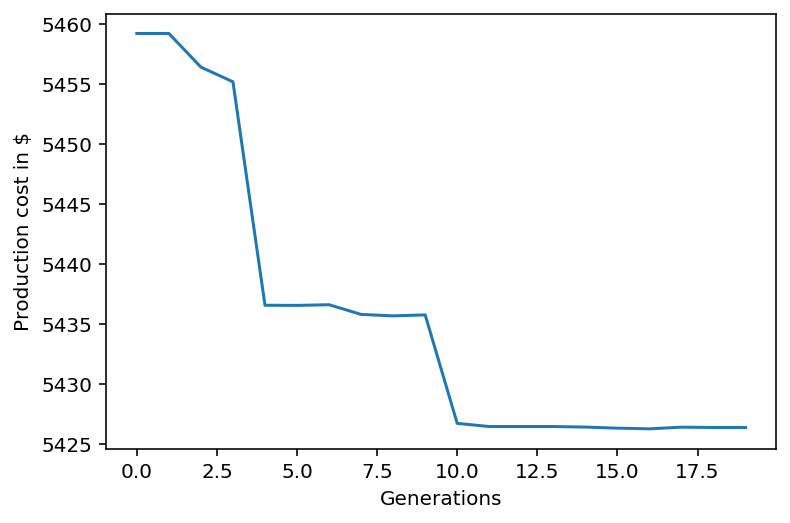

In [18]:
plt.plot(production_costs(Evaluation))
plt.xlabel("Generations")
plt.ylabel("Production cost in $")
plt.show()

In [88]:
print("Minimum Producion Cost using Genetic Algorithm is",round(solution(Evaluation)[2],2),"$/hr for P1 =", round(solution(Evaluation)[0],2),"MW and P2 =",round(solution(Evaluation)[1],2),"MW")

Minimum Producion Cost using Genetic Algorithm is 5426.25 $/hr for P1 = 350.0 MW and P2 = 325.0 MW
